# XOR binary classification problem

In [1]:
import sys
import os
import random
import csv
from pprint import pprint

from matplotlib import pyplot as plt

module_path = os.path.abspath("..")
sys.path.append(module_path)

from perceptron import Perceptron, cross_validation


In [2]:
features = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
targets = [[0], [1], [1], [0]]


# Single layer model

Training: 100% |████████████████████████████████████████| 25/25, binary_accuracy=0.75, mae=0.49, sse=1.33


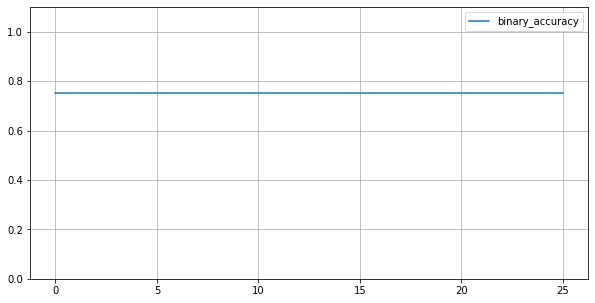

In [3]:
random.seed(0)

model = Perceptron(
    inputs=2,
    layer_sizes=[1],
    activations="leaky_relu",
    init_method="he",
    optimizer="momentum",
)

epochs = 25

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.1,
    learning_rate_decay="exponential",
    metrics=["binary_accuracy", "sse", "mae"],
)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["binary_accuracy"], label="binary_accuracy")

ax.set_ylim(bottom=0, top=1.1)
ax.grid()
ax.legend()
plt.show()


# Multi-layer model

Training: 100% |████████████████████████████████████████| 25/25, binary_accuracy=1, mae=0.167, sse=0.112  


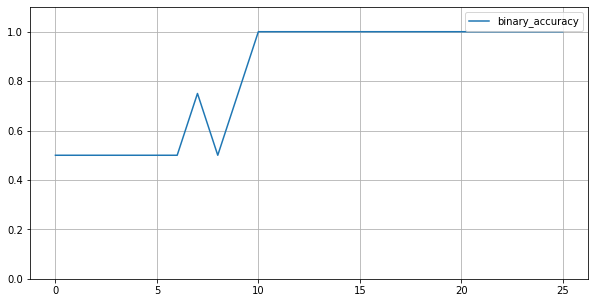

In [4]:
random.seed(0)

model = Perceptron(
    inputs=2,
    layer_sizes=[8, 1],
    activations="leaky_relu",
    init_method="he",
    optimizer="adam",
)

epochs = 25

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.1,
    learning_rate_decay="linear",
    metrics=["binary_accuracy", "sse", "mae"],
)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["binary_accuracy"], label="binary_accuracy")

ax.set_ylim(bottom=0, top=1.1)
ax.grid()
ax.legend()
plt.show()
